### Importación de datos



In [155]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [8]:
print(tienda.info())
print(tienda2.info())
print(tienda3.info())
print(tienda4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data col

In [11]:
print(tienda.shape)
print(tienda2.shape)
print(tienda3.shape)
print(tienda4.shape)

(2359, 12)
(2359, 12)
(2359, 12)
(2358, 12)


#1. Análisis de facturación



In [19]:
# Se procede a realizar la suma de la columna "Precios" en cada tabla para calcular el ingreso total

ingreso_total_t1 = tienda['Precio'].sum()
ingreso_total_t2 = tienda2['Precio'].sum()
ingreso_total_t3 = tienda3['Precio'].sum()
ingreso_total_t4 = tienda4['Precio'].sum()

print(ingreso_total_t1)
print(tienda['Precio'].sum())

1150880400.0
1150880400.0


In [ ]:
# podemos concatenar los resultados y mostrarlos en un gráfico para poder tener una mejor visibilidad

ingreso_total = pd.DataFrame({
    'Tienda' : ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
    'Ingresos_Totales' : [ingreso_total_t1, ingreso_total_t2, ingreso_total_t3, ingreso_total_t4]
})

# investigando, encontré que es necesario formatear los resultados de pandas ya que puede devolver en formato científico los valores númericos extensos
# por lo que es necesario aplicar el siguiente código para poder mostrarlos como float:

pd.set_option('display.float_format', '{:,.2f}'.format)

print(ingreso_total)

     Tienda  Ingresos_Totales
0  Tienda_1  1,150,880,400.00
1  Tienda_2  1,116,343,500.00
2  Tienda_3  1,098,019,600.00
3  Tienda_4  1,038,375,700.00


C:\Users\david\AppData\Local\Temp\ipykernel_6352\1571945910.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  gr_ingresos_t.figure.show()


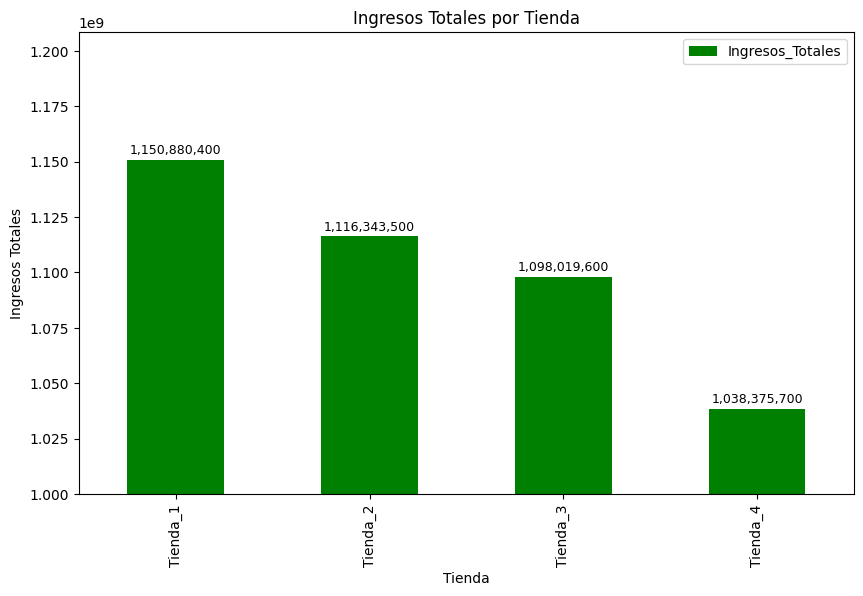

In [ ]:
gr_ingresos_t = ingreso_total.plot(x= 'Tienda', y= 'Ingresos_Totales', kind='bar', color='green', figsize=(10, 6))

# al tratarse de miles de millones, podemos empezar el gráfico desde el 1B para hacerlo mas visible
gr_ingresos_t.set_ylim(1000000000, None)

# Podemos agregarle etiquetas al gráfico
gr_ingresos_t.bar_label(
    gr_ingresos_t.containers[0],
    labels=[f"{x:,.0f}" for x in ingreso_total['Ingresos_Totales']], #esto para evitar el formato cientifico
    label_type='edge',
    padding=2,
    fontsize=9,
    color='black'
)

gr_ingresos_t.set_title('Ingresos Totales por Tienda')
gr_ingresos_t.set_xlabel('Tienda')
gr_ingresos_t.set_ylabel('Ingresos Totales')

gr_ingresos_t.figure.show()

# Podemos ver que la tienda 1 es la que tiene mayores ingresos, mientras que la tienda 4 es la que tiene menor cantidad de ingresos

# 2. Ventas por categoría

In [ ]:
# Nos están pidiendo calcular la cantidad de productos vendidos por categoría en cada tienda, agrupando los datos por 
# categoría y contando el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

tienda.head()

q_prodxcat1 = tienda['Categoría del Producto'].value_counts(ascending = False)
q_prodxcat2 = tienda2['Categoría del Producto'].value_counts(ascending = False)
q_prodxcat3 = tienda3['Categoría del Producto'].value_counts(ascending = False)
q_prodxcat4 = tienda4['Categoría del Producto'].value_counts(ascending = False)

print(q_prodxcat1)
print(q_prodxcat2)
print(q_prodxcat3)
print(q_prodxcat4)


Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                

C:\Users\david\AppData\Local\Temp\ipykernel_6352\3873669459.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  gr_prodxcat_t.figure.show()


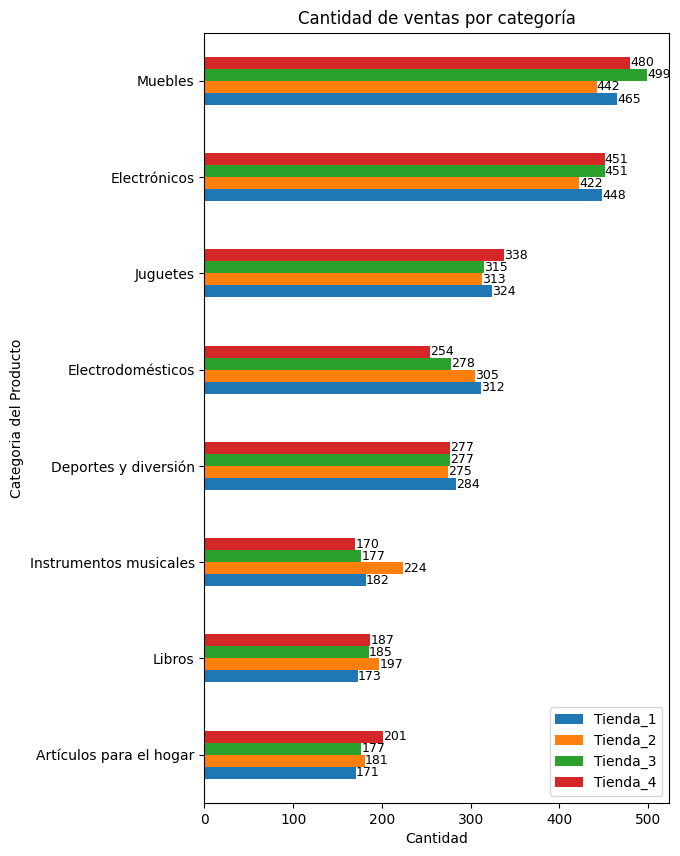

In [ ]:
# SI queremos mostrar el resultado en un gráfico combinado, podemos hacer lo siguiente:

q_prodxcat_t = pd.DataFrame({
    'Tienda_1': q_prodxcat1,
    'Tienda_2': q_prodxcat2,
    'Tienda_3': q_prodxcat3,
    'Tienda_4': q_prodxcat4,
})

#ordenamos para que se muestre de forma descendente de acuerdo a la cantidad de ventas por categoria
q_prodxcat_t = q_prodxcat_t.loc[q_prodxcat_t.sum(axis=1).sort_values(ascending=True).index]

#se crea el gráfico
gr_prodxcat_t = q_prodxcat_t.plot(kind='barh', figsize=(6,10))

#agregamos etiquetas a través de un for
for container in gr_prodxcat_t.containers:
    gr_prodxcat_t.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

gr_prodxcat_t.set_title('Cantidad de ventas por categoría')
gr_prodxcat_t.set_xlabel('Cantidad')
gr_prodxcat_t.set_ylabel('Categoria del Producto')

gr_prodxcat_t.figure.show()

#Podemos observar que en las 4 tiendas, las 3 categorias mas vendidas son Muebles, Electrónicos y Juguetes.


# 3. Calificación promedio de la tienda


In [91]:
#En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. 
# El objetivo es conocer la satisfacción del cliente con los productos vendidos.

calif_prom_t1 = round((tienda['Calificación'].mean()),2)
calif_prom_t2 = round((tienda2['Calificación'].mean()),2)
calif_prom_t3 = round((tienda3['Calificación'].mean()),2)
calif_prom_t4 = round((tienda4['Calificación'].mean()),2)

print(calif_prom_t1)
print(calif_prom_t2)
print(calif_prom_t3)
print(calif_prom_t4)


3.98
4.04
4.05
4.0


C:\Users\david\AppData\Local\Temp\ipykernel_6352\2917073159.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  gr_calif_prom_t.figure.show()


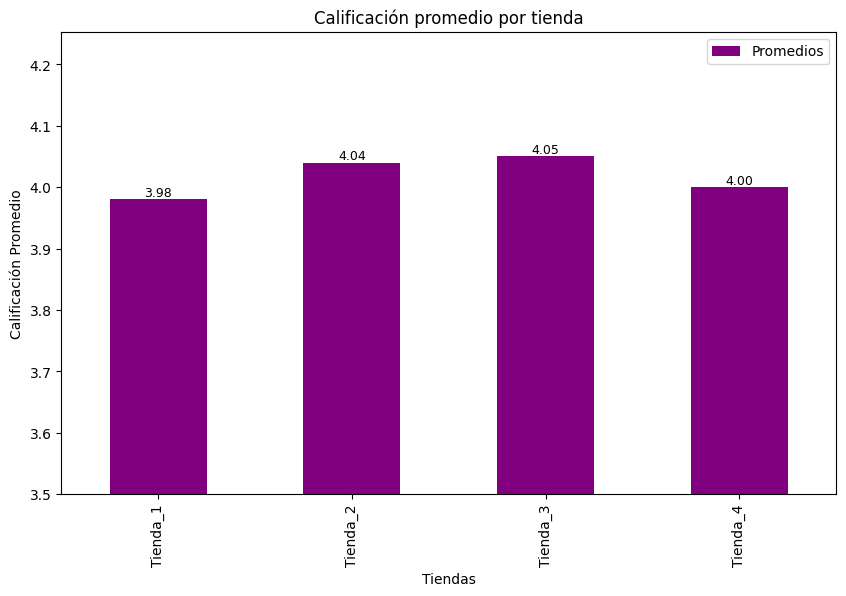

In [ ]:
# volcamos la información en un grafico para poder tener mayor visibilidad

tiendas = ['Tienda_1','Tienda_2','Tienda_3','Tienda_4']
promedios = [calif_prom_t1,calif_prom_t2,calif_prom_t3,calif_prom_t4]

calif_prom_t = pd.DataFrame({
    'Tiendas' : tiendas,
    'Promedios' : promedios
})

gr_calif_prom_t = calif_prom_t.plot(x='Tiendas', y='Promedios', kind='bar', color='purple', figsize=(10,6), title='Calificación promedio por tienda')

gr_calif_prom_t.set_ylim(3.5, None)
gr_calif_prom_t.bar_label(
    gr_calif_prom_t.containers[0],
    labels=[f"{x:,.2f}" for x in calif_prom_t['Promedios']],
    fmt='%.0f', 
    label_type='edge', 
    fontsize=9, 
    color= 'black'
    )
gr_calif_prom_t.set_ylabel('Calificación Promedio')
gr_calif_prom_t.set_xlabel('Tiendas')

gr_calif_prom_t.figure.show()

#Con esto podemos determinar que la tienda 3 es la que tiene mejor calificación por parte de los clientes, sin embargo no hay una diferencia considerable entre las 4.

# 4. Productos más y menos vendidos

In [156]:
# En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. 
# Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


q_prod_t1 = tienda['Producto'].value_counts().rename('Tienda_1').sort_values(ascending=False).to_frame()
q_prod_t2 = tienda2['Producto'].value_counts().rename('Tienda_2').sort_values(ascending=False).to_frame()
q_prod_t3 = tienda3['Producto'].value_counts().rename('Tienda_3').sort_values(ascending=False).to_frame()
q_prod_t4 = tienda4['Producto'].value_counts().rename('Tienda_4').sort_values(ascending=False).to_frame()


In [160]:
# Mostremos el resultado como texto para que pueda entenderse mejor. Al tener mucha información sobre los productos, puede no ser legible en un grafico

q_prod_dict = {
    'Tienda_1': q_prod_t1,
    'Tienda_2': q_prod_t2,
    'Tienda_3': q_prod_t3,
    'Tienda_4': q_prod_t4,
}

# Iteramos el diccionario para poder mostrar los mensajes:

for tiendas, q in q_prod_dict.items():
    top = q.head(5)
    bottom = q.tail(5)

    print(f"\n{'='*80}")
    print(f"Para la {tiendas}, los 5 productos MÁS vendidos fueron:\n")
    for producto, fila in top.iterrows():
        print(f"  - {producto}: {fila[tiendas]}")
    
    print(f"\nMientras que los 5 productos MENOS vendidos fueron:\n")
    for producto, fila in bottom.iterrows():
        print(f"  - {producto}: {fila[tiendas]}")




Para la Tienda_1, los 5 productos MÁS vendidos fueron:

  - Microondas: 60
  - TV LED UHD 4K: 60
  - Armario: 60
  - Secadora de ropa: 58
  - Mesa de noche: 56

Mientras que los 5 productos MENOS vendidos fueron:

  - Ciencia de datos con Python: 39
  - Pandereta: 36
  - Olla de presión: 35
  - Auriculares con micrófono: 33
  - Celular ABXY: 33

Para la Tienda_2, los 5 productos MÁS vendidos fueron:

  - Iniciando en programación: 65
  - Microondas: 62
  - Batería: 61
  - Guitarra acústica: 58
  - Pandereta: 58

Mientras que los 5 productos MENOS vendidos fueron:

  - Auriculares: 37
  - Sillón: 35
  - Mesa de comedor: 34
  - Impresora: 34
  - Juego de mesa: 32

Para la Tienda_3, los 5 productos MÁS vendidos fueron:

  - Kit de bancas: 57
  - Mesa de comedor: 56
  - Cama king: 56
  - Set de ollas: 55
  - Mesa de noche: 55

Mientras que los 5 productos MENOS vendidos fueron:

  - Guitarra eléctrica: 38
  - Set de vasos: 36
  - Mochila: 36
  - Microondas: 36
  - Bloques de construcción:

# 5. Envío promedio por tienda